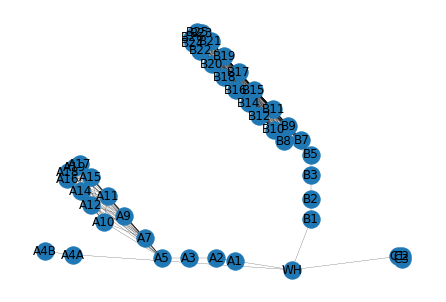

In [1]:
from src.graph_loader import GraphLoader
import networkx as nx

G = GraphLoader('data/gate_pos.csv').create_dense()
node_pos=nx.get_node_attributes(G,'pos')
nx.draw(G,node_pos,width=0.2,with_labels=True)